In [1]:
import seaborn as sns
import matplotlib as mpl
import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import scipy.integrate as integrate
import matplotlib.colors as mcolors
import matplotlib.cm

In [2]:
f_diss = 0.1
X = 0.74 
F0 = 2.1e7
G0 = 2. * f_diss * F0 * mp/X
r0 = 250. * pc
v0 = 170. * kmps
t0 = r0/v0
Mach = 1.e3
Sigma0        = 52.*Msun_pcsq
rmax = 10. * kpc
tdyn = rmax/v0
sat_time = (Sigma0/G0)/Myr
xi_sol = np.log(G0*t0/Sigma0)
xi_sol, G0

(-3.3011022787786, 9.478378378378378e-18)

# Fixed Area Case

In [3]:
def dMassFlux_Hi_fAr(x, a, gamma, t0, G0, Sigma0, M, p):
    pm = getPm(x, M)
    fhi = (2. * G0 * t0* np.exp(-x)/Sigma0)/np.sqrt(gamma*np.exp(-x)-1.)
    fhi *= np.sqrt((a-1.)/a)
    if(fhi>1.):
        fhi=1
       
    uax = np.sqrt((gamma*np.exp(-x) -1)) * np.sqrt((a-1.)/a) 
    return fhi*pm*uax


def dMassFlux_tot_fAr(x, a, gamma, t0, G0, Sigma0, M, p):
    pm = getPm(x, M)
#     dfhi = np.sqrt((gamma*np.exp(-x) -1)) * np.sqrt((a-1.)/a) * pm
    dfhi = Uax_fAr(a, gamma, x) * pm
    return dfhi

In [4]:
Gamma = np.logspace(-2, 2., 20)
xi_arr = np.linspace(-5, 5., 20) #xi = np.log(t0*G0/Sigma0)

sat_rate = 1./sat_time

a = rmax/r0

dMassFluxHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        if(xcrit<0.0):
            xhigh = 1.*xcrit
            xlow  = 1.5*xcrit
        else:
            xhigh = 1.*xcrit
            xlow  = 0.5*xcrit
            
        G0 = Sigma0*np.exp(xi)/t0
    
        dMassFluxHI[i,j] = integrate.quad(dMassFlux_HI, xlow, xhigh,   \
                                            args=(a, gamma, r0/v0, G0, Sigma0, Mach, 0))[0]
        
        dMassFluxtot[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                            args=(a, gamma, r0/v0, G0, Sigma0, Mach, 0))[0]
        
        if(np.isnan(dMassFluxHI[i,j])):
            print(xlow, xhigh, gamma)
        
        j+=1
            
    i+=1

dMassFlux = dMassFluxHI/dMassFluxtot
FH2_fAr = 1. - dMassFlux
np.amax(FH2_fAr),np.amin(FH2_fAr)

(0.9996568102919895, 0.0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


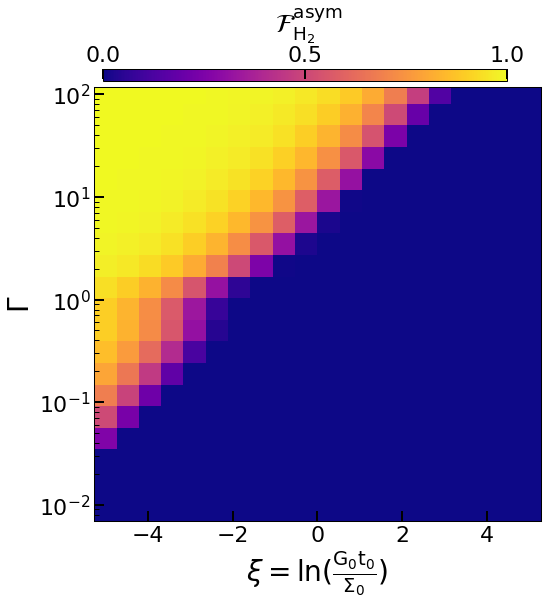

In [16]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.141
cbheight = 0.02
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1


plot = ax.pcolormesh(xi_arr, Gamma, np.transpose(FH2_fAr),\
                    vmin=0.0, vmax=1.,
                    cmap='plasma')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.5, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}^{\rm asym}$")

ax.set_ylabel(r'$\Gamma$', fontsize=28)
ax.set_xlabel(r'$\xi=\rm{ln}(\frac{G_0 t_0}{\Sigma_0})$', fontsize=28)
# ax.text(0.56, 0.14,r'$\mathcal{M}=%.f$'%(Mach), transform=ax.transAxes, color='white', fontsize=26)
# ax.axvline(56, ls='--', color='white', label=r'$t_{\rm dyn}$')
ax.legend(loc='lower left', frameon=False, labelcolor='white')
file_name = os.path.join(fig_path, 'gamma_Mach_sinv_38M.jpeg')
# ax.axvline(xi_sol, ls='--', color='white')
ax.set_yscale('log')
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )

# Fixed Solid Angle Case

In [1]:
Gamma = np.logspace(-2, 2., 20)
xi_arr = np.linspace(-5, 5., 20) #xi = np.log(t0*G0/Sigma0)
sat_rate = 1./sat_time

a = rmax/r0

dMassFluxHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        if(xcrit<0.0):
            xhigh = 1.*xcrit
            xlow  = 1.5*xcrit
        else:
            xhigh = 1.*xcrit
            xlow  = 0.5*xcrit
            
        G0 = Sigma0*np.exp(xi)/t0
        
        dMassFluxHI[i,j] = integrate.dblquad(dMassFlux_HI, 1, a, xlow, xhigh,   \
                                            args=(gamma, r0/v0, G0, Sigma0, Mach, 2))[0]
        
        dMassFluxtot[i,j] = integrate.dblquad(dMassFlux_tot, 1, a, xlow, xhigh,  \
                                            args=(gamma, r0/v0, G0, Sigma0, Mach, 2))[0] 
        
        j+=1
            
    i+=1
    
dMassFlux = dMassFluxHI/dMassFluxtot
FH2_fSA = 1. - dMassFlux
np.amax(FH2_fSA),np.amin(FH2_fSA)

NameError: name 'np' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.01, 100.0)

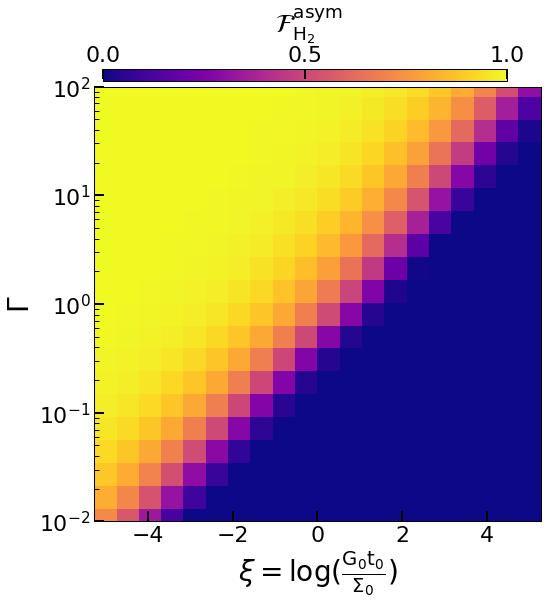

In [14]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.141
cbheight = 0.02
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1


plot = ax.pcolormesh(xi_arr, Gamma, np.transpose(FH2_fSA),\
                    vmin=0.0, vmax=1.,
                    cmap='plasma')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.5, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}^{\rm asym}$")

ax.set_ylabel(r'$\Gamma$', fontsize=28)
ax.set_xlabel(r'$\xi=\rm{log}(\frac{G_0 t_0}{\Sigma_0})$', fontsize=28)
# ax.text(0.56, 0.14,r'$\mathcal{M}=%.f$'%(Mach), transform=ax.transAxes, color='white', fontsize=26)
ax.legend(loc='lower left', frameon=False, labelcolor='white')
# ax.axvline(xi_sol, ls='--', color='red')
file_name = os.path.join(fig_path, 'gamma_Mach_sinv_38M.jpeg')
ax.set_yscale('log')

x_arr = np.linspace(-5,5,20)
y_arr = 0.5*(10.**x_arr) **(3.5/8.)
# ax.plot(x_arr, y_arr, color='white', label=r'$\Gamma \propto (G_0 t_0/\Sigma_0)^{0.43}$')
ax.set_ylim(np.amin(Gamma),np.amax(Gamma))
# ax.legend()
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )

# Intermediate Area Case

In [8]:
Gamma = np.logspace(-2, 2., 20)
xi_arr = np.linspace(-5, 5., 20) #xi = np.log(t0*G0/Sigma0)

a = rmax/r0

dMassFluxHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        if(xcrit<0.0):
            xhigh = 1.*xcrit
            xlow  = 1.5*xcrit
        else:
            xhigh = 1.*xcrit
            xlow  = 0.5*xcrit
            
        G0 = Sigma0*np.exp(xi)/t0
        
        dMassFluxHI[i,j] = integrate.dblquad(dMassFlux_HI,1, a, xlow, xhigh,   \
                                            args=(gamma, r0/v0, G0, Sigma0, Mach, 1))[0]
        
        dMassFluxtot[i,j] = integrate.dblquad(dMassFlux_tot, 1, a, xlow, xhigh,  \
                                            args=(gamma, r0/v0, G0, Sigma0, Mach, 1))[0] 
        
        j+=1
            
    i+=1
dMassFlux = dMassFluxHI/dMassFluxtot
FH2_int = 1. - dMassFlux
np.amax(FH2_int),np.amin(FH2_int)

/Users/aditivijayan/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


(0.9999851153649023, 0.0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


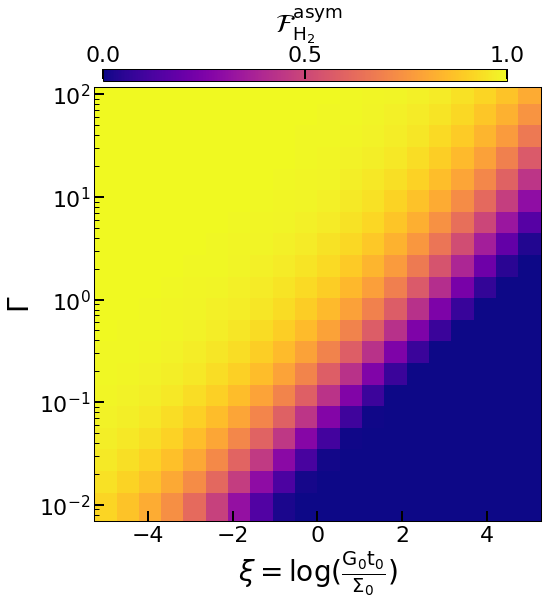

In [12]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.141
cbheight = 0.02
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1


plot = ax.pcolormesh(xi_arr, Gamma, np.transpose(FH2_int),\
                    vmin=0.0, vmax=1.,
                    cmap='plasma')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.5, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}^{\rm asym}$")

ax.set_ylabel(r'$\Gamma$', fontsize=28)
ax.set_xlabel(r'$\xi=\rm{log}(\frac{G_0 t_0}{\Sigma_0})$', fontsize=28)
# ax.text(0.56, 0.14,r'$\mathcal{M}=%.f$'%(Mach), transform=ax.transAxes, color='white', fontsize=26)
# ax.axvline(56, ls='--', color='white', label=r'$t_{\rm dyn}$')
ax.legend(loc='lower left', frameon=False, labelcolor='white')
# ax.axvline(xi_sol, ls='--', color='red')
# ax.axvline(xi_sol + np.log(10.), ls='--', color='red')
# ax.axvline(xi_sol + np.log(100.), ls='--', color='black')
file_name = os.path.join(fig_path, 'gamma_Mach_sinv_38M.jpeg')
ax.set_yscale('log')
plt.savefig(file_name, bbox_inches='tight', dpi=160 )